# aSPEM Experiment : analysis




In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import scipy as sc
from scipy import stats

In [2]:
!ls data/

enregistrement_AM_2017-10-23_100057.asc
enregistrement_AM_2017-10-23_100057.edf
enregistrement_AM_2017-10-23_100057.pkl
enregistrement_BMC_2017-09-26_095637.asc
enregistrement_BMC_2017-09-26_095637.EDF
enregistrement_BMC_2017-09-26_095637.pkl
enregistrement_CS_2017-10-03_134421.asc
enregistrement_CS_2017-10-03_134421.edf
enregistrement_CS_2017-10-03_134421.pkl
enregistrement_DC_2017-09-27_161040.asc
enregistrement_DC_2017-09-27_161040.edf
enregistrement_DC_2017-09-27_161040.pkl
enregistrement_FM_2017-10-03_143803.asc
enregistrement_FM_2017-10-03_143803.EDF
enregistrement_FM_2017-10-03_143803.pkl
enregistrement_IP_2017-09-28_115250.asc
enregistrement_IP_2017-09-28_115250.edf
enregistrement_IP_2017-09-28_115250.pkl
enregistrement_LB_2017-09-20_151043 (1).asc
enregistrement_LB_2017-09-20_151043.asc
enregistrement_LB_2017-09-20_151043.edf
enregistrement_LB_2017-09-20_151043.pkl
enregistrement_OP_2017-10-26_121823.asc
enregistrement_OP_2017-10-26_121823.edf
enregistrement_OP_2017-10-26_1218

In [3]:
%matplotlib inline
fig_width = 12

from aSPEM import aSPEM

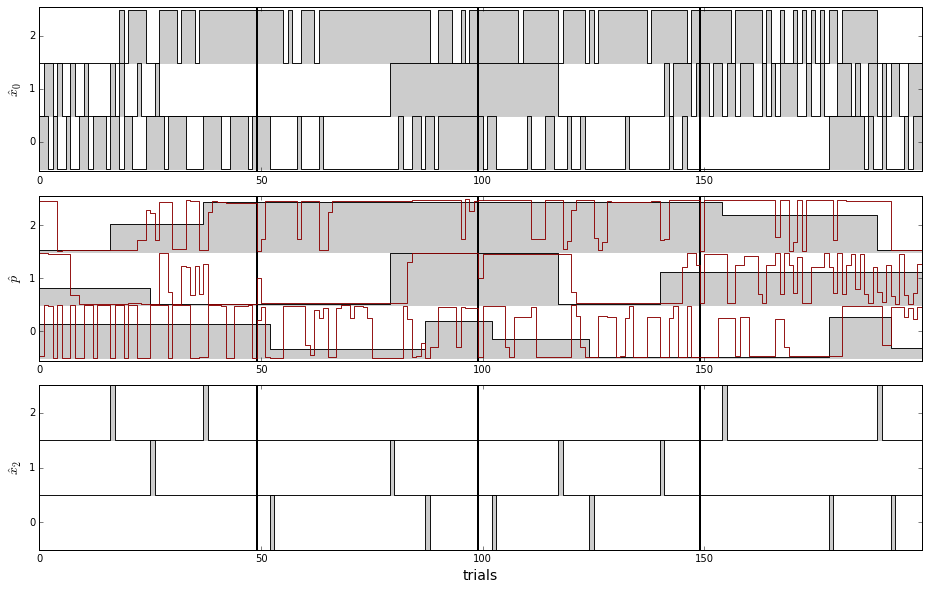

In [4]:
timeStr = '2017-11-07_105527'
observer = 'RS'

mode = 'pari'
e = aSPEM(mode, timeStr, observer)

fig, axs, p = e.plot(mode=mode)

In [5]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    #print(a)

In [6]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM', 'BMC', 'CS', 'DC', 'FM', 'LB', 'OP', 'RS', 'TN','YK'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)


 TN 2017-11-08_155132 = black
stim_tau = 0.75     Vitesse (deg/s) = 15.0
block 1 = (0.62080111212829803, 1.0660822659283132e-22)
         1 : p = 0.647523519824 --> 0.478773584906 ( +/- 0.166345020116 )
         2 : p = 0.159515642516 --> 0.412 ( +/- 0.111817453276 )
         3 : p = 0.700809315349 --> 0.48 ( +/- 0.155820409446 )
         4 : p = 0.363458203853 --> 0.260681818182 ( +/- 0.113471016068 )
         5 : p = 0.0216407145976 --> 0.114537037037 ( +/- 0.161243054741 )
         6 : p = 0.770964181565 --> 0.749642857143 ( +/- 0.344966169592 )
         7 : p = 0.17987589782 --> 0.147857142857 ( +/- 0.248881169908 )
block 2 = (0.7358294955941328, 2.3025510386595033e-35)
         1 : p = 0.309087453462 --> 0.580192307692 ( +/- 0.329149488978 )
         2 : p = 0.0239682943655 --> 0.0346296296296 ( +/- 0.137917218367 )
         3 : p = 0.986124321066 --> 0.909868421053 ( +/- 0.235130106319 )
         4 : p = 0.0102498711568 --> 0.108695652174 ( +/- 0.263753085254 )
         5 : p = 


 CS 2017-09-28_154353 = darkred
stim_tau = 0.75     Vitesse (deg/s) = 15.0
block 1 = (0.28650665241724677, 3.9059355988164619e-05)
         1 : p = 0.647523519824 --> 0.455377358491 ( +/- 0.312599944858 )
         2 : p = 0.159515642516 --> 0.441714285714 ( +/- 0.328361610026 )
         3 : p = 0.700809315349 --> 0.682666666667 ( +/- 0.373125835194 )
         4 : p = 0.363458203853 --> 0.409545454545 ( +/- 0.375087593076 )
         5 : p = 0.0216407145976 --> 0.283796296296 ( +/- 0.290789052957 )
         6 : p = 0.770964181565 --> 0.653571428571 ( +/- 0.35225512554 )
         7 : p = 0.17987589782 --> 0.357142857143 ( +/- 0.257416521043 )
block 2 = (0.74234806954475319, 2.788455270982411e-36)
         1 : p = 0.309087453462 --> 0.530769230769 ( +/- 0.297165106619 )
         2 : p = 0.0239682943655 --> 0.118148148148 ( +/- 0.180393849715 )
         3 : p = 0.986124321066 --> 0.888947368421 ( +/- 0.243840321713 )
         4 : p = 0.0102498711568 --> 0.0589130434783 ( +/- 0.212623143459

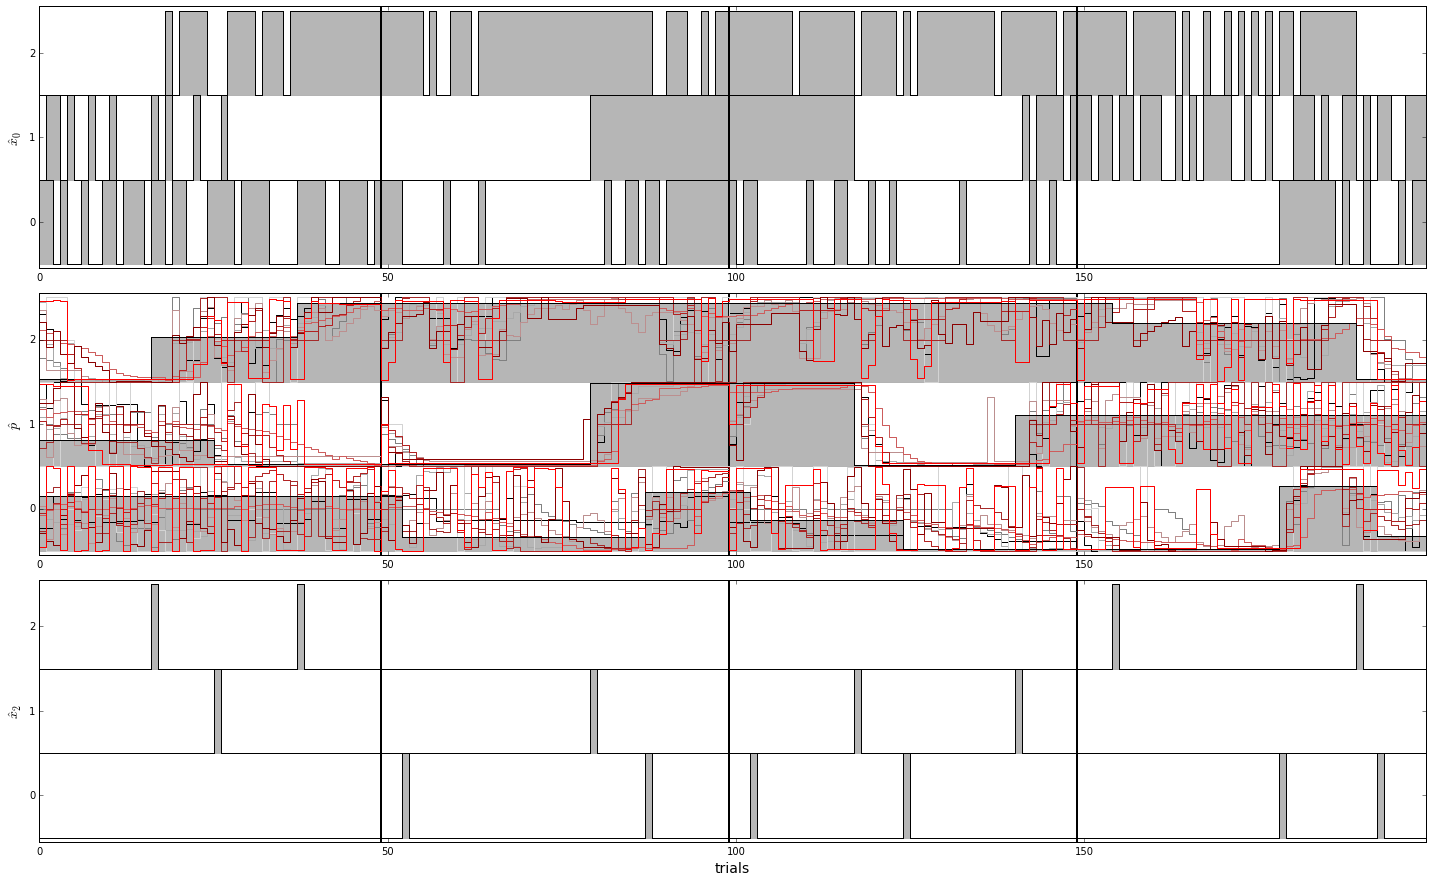

In [7]:
fig_width = 20
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/(1.6180)))
        
mean = []
std = []

for x, color in enumerate(['black', 'grey', 'darkgrey', 'lightgrey', 'rosybrown', 'indianred', 'firebrick', 'brown', 'darkred', 'red']):
        
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    corrects = 0

    for i_layer, label in enumerate([r'$\^x_0$', r'$\^p$', r'$\^x_2$']):
        #axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_blocks+1)]))
        axs[i_layer].step(range(N_trials), p[:, :, i_layer]+stick[:, :, i_layer], lw=1, c='k', alpha=.9)
        for i_block in range(N_blocks):
            axs[i_layer].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.03, facecolor='black', step='pre')
            #_ = axs[i_layer].fill_between(range(N_trials), i_block + np.ones_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.1, facecolor='red', step='pre')
        axs[i_layer].axis('tight')
        axs[i_layer].set_yticks(np.arange(N_blocks)+.5)
        axs[i_layer].set_yticklabels(np.arange(N_blocks) )
        axs[i_layer].set_ylabel(label, fontsize=14)
        axs[i_layer].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
        axs[i_layer].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
        axs[i_layer].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
        
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    print('\n', exp[x]['observer'], exp[x]['timeStr'], '=',color )
    print ('stim_tau =', exp[x]['stim_tau'], '    Vitesse (deg/s) =', exp[x]['V_X']/exp[x]['px_per_deg'])

    mean_block = []
    std_block = []
    proba_switch = []
    
    for block in range(N_blocks):
        mean_switch = []
        std_switch = []
        _ = axs[1].step(range(N_trials), block + results[:, block],  color=color, lw=1, label=exp[x]['observer'])
        print('block', block+1, '=', sc.stats.pearsonr(p[:, block, 1], results[:,block]))
                
        switch = [0]
        p_switch = [p[0, block, 1]]
        for s in range(N_trials):
            if p[s, block, 2]==1 :
                switch.append(s)
                p_switch.append(p[s, block, 1])
        switch.append(N_trials)
        
        proba_switch.append(p_switch)
        
        for s1 in range(len(switch)-1) :
            mean_s1 = np.mean(results[switch[s1]:switch[s1+1],block])
            std_s1 = np.std(results[switch[s1]:switch[s1+1],block])
            print('        ',s1+1, ': p =', p_switch[s1] , '-->', mean_s1, '( +/-', std_s1, ')')
        
            mean_switch.append(mean_s1)
            std_switch.append(std_s1)
        
        mean_block.append(mean_switch)
        std_block.append(std_switch)

    mean.append(mean_block)
    std.append(std_block)
    
    fig.tight_layout()
    for i in range(2): axs[i].set_ylim(-.05, N_blocks + .05)
    axs[-1].set_xlabel('trials', fontsize=14)


plt.show()

In [8]:
moyenne = []
ecart_type = []
for block in range(len(mean[0])) :
    moyenne_switch_block = []
    std_switch_block = []
    
    print('block ', block)
    for switch in range(len(mean[0][block])):
        liste_moyenne = []
        liste_std = []
        for sujet in range(len(mean)) :
            liste_moyenne.append(mean[sujet][block][switch])
            liste_std.append(std[sujet][block][switch])
            #print (sujet, block, switch, '-->', mean[sujet][block][switch])
        moyenne_switch_block.append(np.mean(liste_moyenne))
        std_switch_block.append(np.mean(liste_std))
        
        print('        ',switch+1, ': p =', proba_switch[block][switch] , '-->', np.mean(liste_moyenne), '( +/-', np.mean(liste_std),')')
        
    moyenne.append(moyenne_switch_block)
    ecart_type.append(std_switch_block)

block  0
         1 : p = 0.647523519824 --> 0.494311320755 ( +/- 0.250872912394 )
         2 : p = 0.159515642516 --> 0.358885714286 ( +/- 0.272937866039 )
         3 : p = 0.700809315349 --> 0.608933333333 ( +/- 0.248087016885 )
         4 : p = 0.363458203853 --> 0.407681818182 ( +/- 0.222094858218 )
         5 : p = 0.0216407145976 --> 0.198472222222 ( +/- 0.217889190413 )
         6 : p = 0.770964181565 --> 0.656142857143 ( +/- 0.337168246175 )
         7 : p = 0.17987589782 --> 0.404642857143 ( +/- 0.118738872009 )
block  1
         1 : p = 0.309087453462 --> 0.462365384615 ( +/- 0.245153516231 )
         2 : p = 0.0239682943655 --> 0.0981111111111 ( +/- 0.171414539355 )
         3 : p = 0.986124321066 --> 0.866697368421 ( +/- 0.242820642129 )
         4 : p = 0.0102498711568 --> 0.1165 ( +/- 0.250790650267 )
         5 : p = 0.6131806477 --> 0.540305084746 ( +/- 0.291581102876 )
block  2
         1 : p = 0.033071304189 --> 0.196941176471 ( +/- 0.257345219245 )
         2 : p = 0

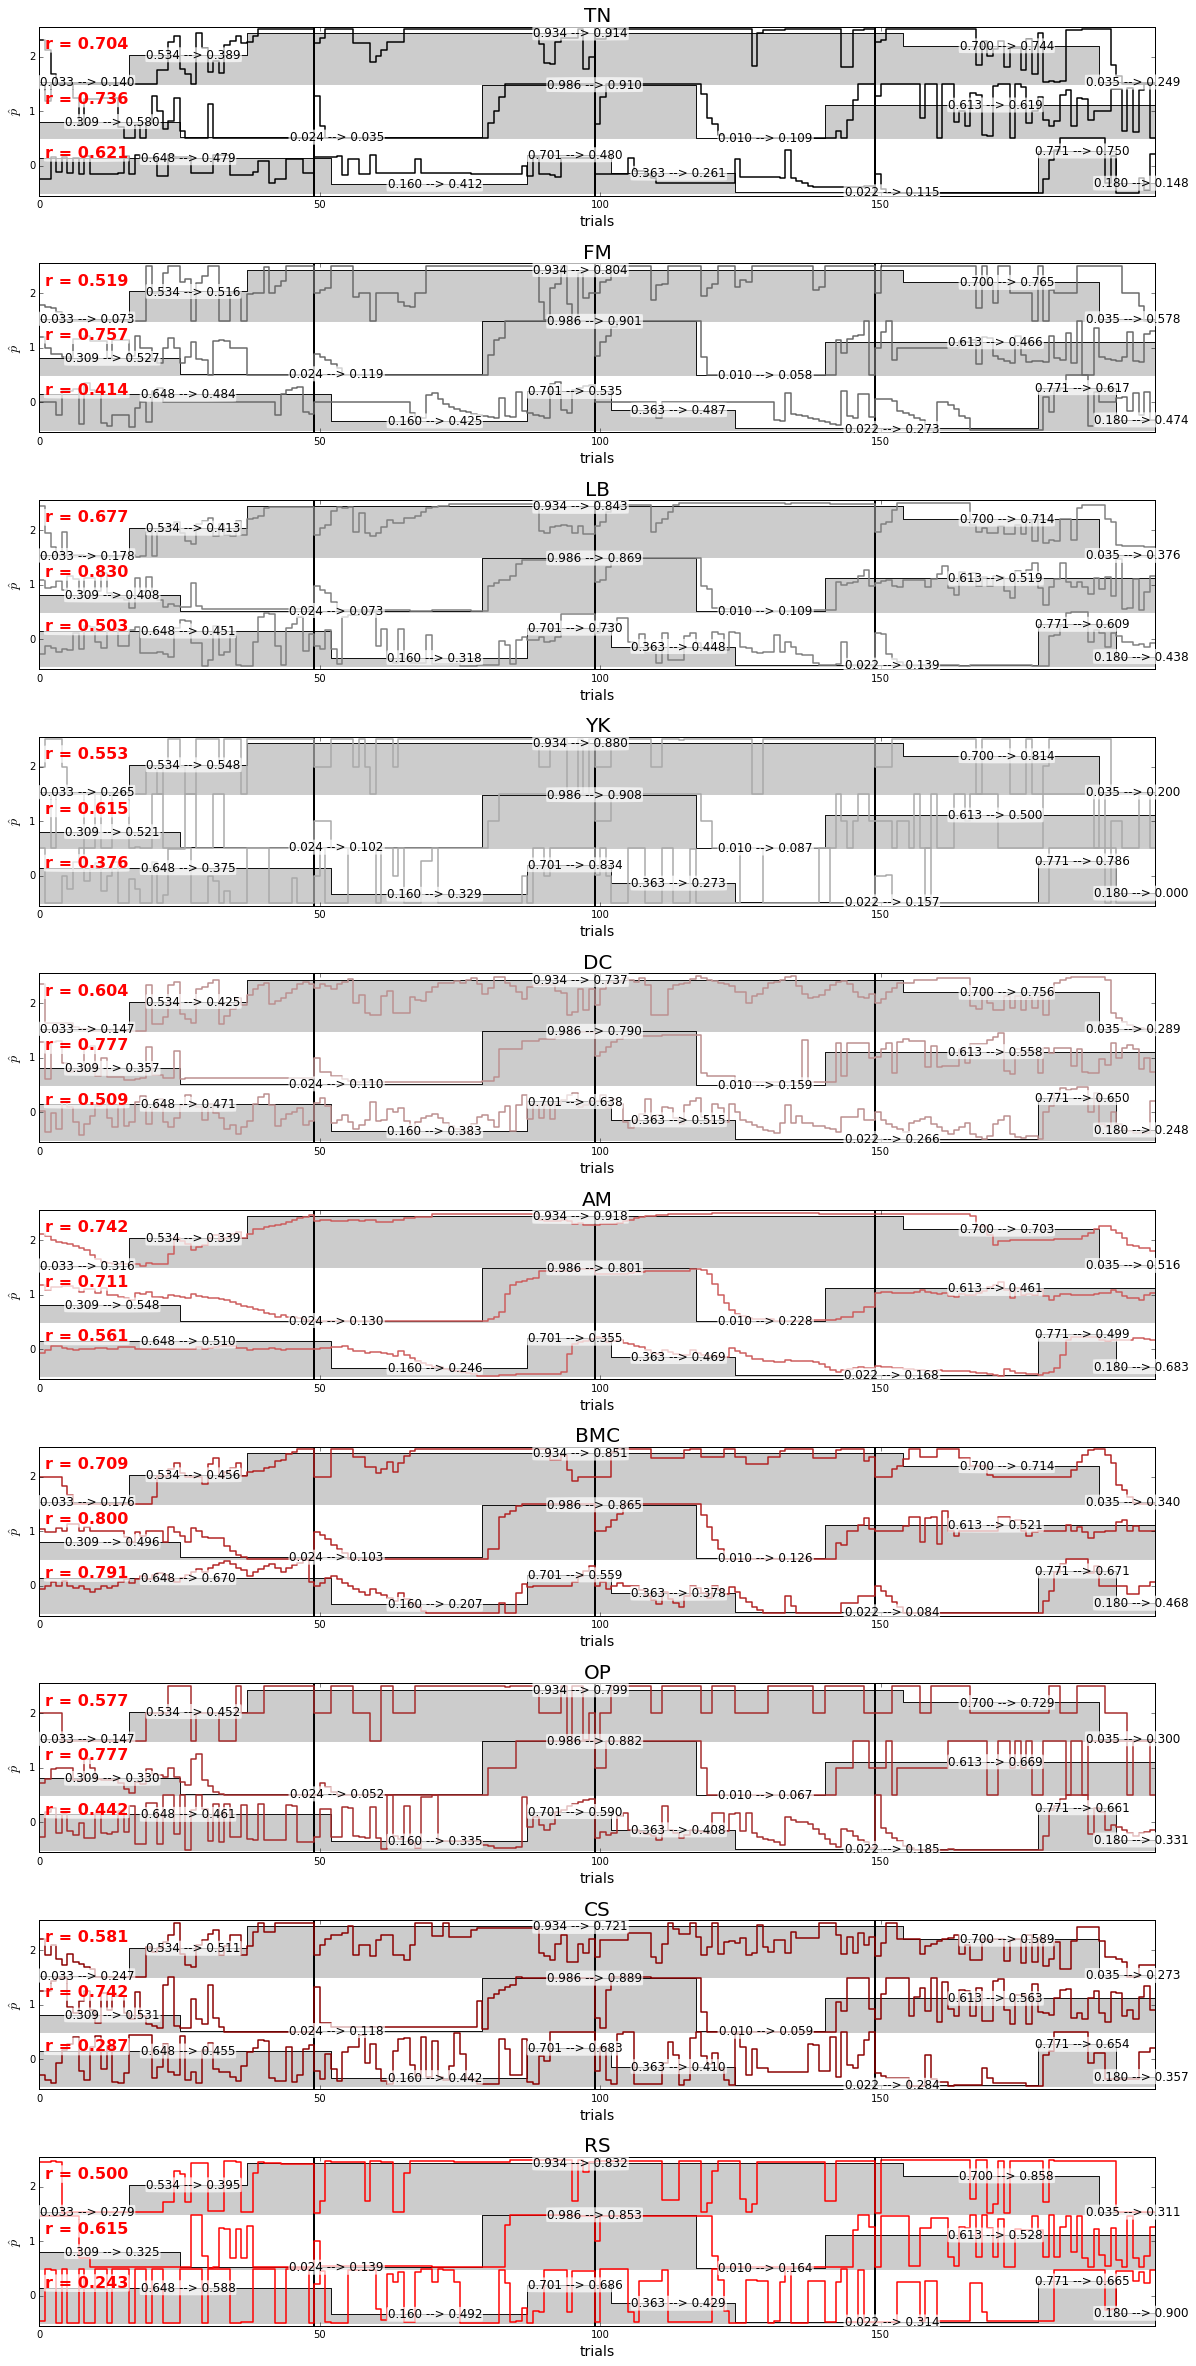

In [9]:
fig_width = 20
fig, axs = plt.subplots(len(exp), 1, figsize=(fig_width, (fig_width*len(exp))/(1.6180*3)))
plt.subplots_adjust(hspace=0.4) 
for x, color in enumerate(['black', 'dimgrey', 'grey', 'darkgrey', 'rosybrown', 'indianred', 'firebrick', 'brown', 'darkred', 'red']):
    #fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width/(1.6180*3)))
    
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]

    axs[x].step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.9)
    axs[x].axis('tight')
    axs[x].set_yticks(np.arange(N_blocks)+.5)
    axs[x].set_yticklabels(np.arange(N_blocks) )
    axs[x].set_ylabel( r'$\^p$', fontsize=14)
    axs[x].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
        
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    #print('\n', exp[x]['observer'], exp[x]['timeStr'], '=',color )
    #print ('stim_tau =', exp[x]['stim_tau'], '    Vitesse (deg/s) =', exp[x]['V_X']/exp[x]['px_per_deg'])

    mean_block = []
    std_block = []
    proba_switch = []
    
    for block in range(N_blocks):
        axs[x].fill_between(range(N_trials), block + np.zeros_like(p[:, block, 1]), block + p[:, block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
    
        axs[x].step(range(N_trials), block + results[:, block],  color=color, lw=1.5)
        #print('block', block+1, '=', sc.stats.pearsonr(p[:, block, 1], results[:,block]))
                
        switch = [0]
        p_switch = [p[0, block, 1]]
        for s in range(N_trials):
            if p[s, block, 2]==1 :
                switch.append(s)
                p_switch.append(p[s, block, 1])
        switch.append(N_trials)
        
        proba_switch.append(p_switch)
        
        for s1 in range(len(switch)-1) :
            mean_s1 = np.mean(results[switch[s1]:switch[s1+1],block])
            std_s1 = np.std(results[switch[s1]:switch[s1+1],block])
            #print('        ',s1+1, ': p =', p_switch[s1] , '-->', mean_s1, '( +/-', std_s1, ')')
            axs[x].text(switch[s1]+(switch[s1+1]-switch[s1])/2, p_switch[s1]+block,'%0.3f --> %0.3f'%(p_switch[s1], mean_s1), fontsize=12, bbox={'fc':'white', 'alpha':0.7,'lw':0, 'pad':0.1, 'boxstyle':'round4'}, va='center',ha='center')
    
        axs[x].text(1, 0.65+block,'r = %0.3f'%(np.corrcoef(results[:, block], p[:, block, 1])[0][1]), color='r', fontsize=16, weight='bold', bbox={'fc':'white', 'alpha':0.7,'lw':0, 'pad':0.1, 'boxstyle':'round4'})
    #fig.tight_layout()
    axs[x].set_ylim(-.05, N_blocks + .05)
    axs[x].set_xlabel('trials', fontsize=14)
    axs[x].set_title('%s'%(exp[x]['observer']), fontsize=20)

plt.show()